<a href="https://colab.research.google.com/github/lagalerie76/estatistica/blob/main/Exercicio_lisane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalação do pacote
!pip install semopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#baixando os dados do excel
!gdown 1UhjA0-4Fp-oi1pY-kli8sWe2DD3v4z2P

Downloading...
From: https://drive.google.com/uc?id=1UhjA0-4Fp-oi1pY-kli8sWe2DD3v4z2P
To: /content/exercicio path (1).xlsx
100% 27.6k/27.6k [00:00<00:00, 23.0MB/s]


In [ ]:
import pandas as pd
from IPython import display

tabela = pd.read_excel('/content/exercicio path (1).xlsx')
tabela.head()

,id,Idade,genero,ALOC,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem
0,1,33,Masculino,Interno,6.6,7.2,3.6,6.6,6.3,7.4,5.3
1,2,24,Feminino,Interno,9.5,9.4,9.3,9.9,9.4,9.9,9.6
2,3,30,Masculino,Interno,6.9,8.8,8.3,7.7,6.7,9.3,8.3
3,4,46,Feminino,Interno,6.5,4.4,5.9,6.7,6.1,6.8,4.7
4,5,28,Feminino,Interno,5.8,7.1,7.6,4.9,4.2,8.6,5.1


In [ ]:
colunas = ['Professor', 'Curso', 'Design', 'Tecnologia', 'Interacao', 'Satisfacao', 'Aprendizagem']

tabela[ colunas ].head() # mostra as 5 primeiras linhas

,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem
0,6.6,7.2,3.6,6.6,6.3,7.4,5.3
1,9.5,9.4,9.3,9.9,9.4,9.9,9.6
2,6.9,8.8,8.3,7.7,6.7,9.3,8.3
3,6.5,4.4,5.9,6.7,6.1,6.8,4.7
4,5.8,7.1,7.6,4.9,4.2,8.6,5.1


In [ ]:
tabela[ colunas ].corr() # correlação entre todas as variáveis

,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem
Professor,1.000000,0.698520,0.666092,0.574275,0.731593,0.689848,0.624066
Curso,0.698520,1.000000,0.787956,0.484048,0.600883,0.859512,0.766186
Design,0.666092,0.787956,1.000000,0.640373,0.613569,0.772872,0.715759
Tecnologia,0.574275,0.484048,0.640373,1.000000,0.607153,0.560064,0.480205
Interacao,0.731593,0.600883,0.613569,0.607153,1.000000,0.709523,0.754506
Satisfacao,0.689848,0.859512,0.772872,0.560064,0.709523,1.000000,0.814815
Aprendizagem,0.624066,0.766186,0.715759,0.480205,0.754506,0.814815,1.000000


# Modelo 1

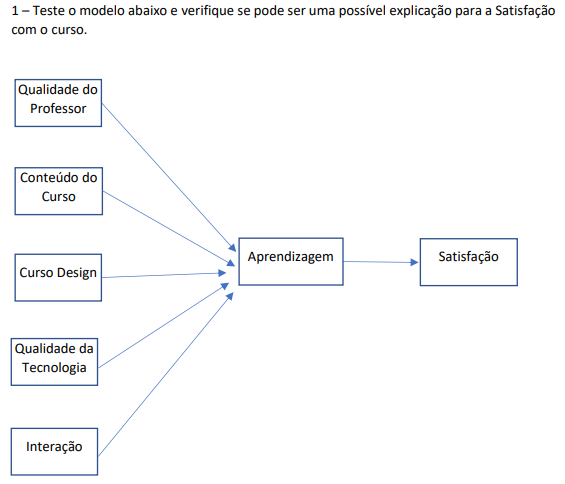

In [ ]:
import semopy

# define full measurement and structural model
modelo_1 = """
Aprendizagem ~ Professor
Aprendizagem ~ Curso
Aprendizagem ~ Design
Aprendizagem ~ Tecnologia
Aprendizagem ~ Interacao

Satisfacao ~ Aprendizagem
"""

modelo_completo_1 = semopy.Model(modelo_1)
resultado_modelo_1 = modelo_completo_1.fit(tabela)
print(resultado_modelo_1)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.629
Number of iterations: 16
Params: -0.184 0.463 0.229 -0.124 0.639 0.861 3.438 2.334


In [ ]:
ins = modelo_completo_1.inspect()
print(ins)

           lval  op          rval  Estimate  Std. Err    z-value   p-value
0  Aprendizagem   ~     Professor -0.183824  0.057286  -3.208875  0.001333
1  Aprendizagem   ~         Curso  0.463037  0.054928   8.429935  0.000000
2  Aprendizagem   ~        Design  0.229493  0.056979   4.027674  0.000056
3  Aprendizagem   ~    Tecnologia -0.124445  0.048006  -2.592269  0.009535
4  Aprendizagem   ~     Interacao  0.639233  0.053338  11.984494  0.000000
5    Satisfacao   ~  Aprendizagem  0.861298  0.034812  24.741082  0.000000
6  Aprendizagem  ~~  Aprendizagem  2.333686  0.187446  12.449900  0.000000
7    Satisfacao  ~~    Satisfacao  3.437953  0.276143  12.449900  0.000000


In [ ]:
semopy.calc_stats(modelo_completo_1)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,20,26,194.99397,0.0,1961.531767,0.909589,0.900591,0.870768,0.900591,0.882465,0.168274,14.741974,44.634553,0.629013


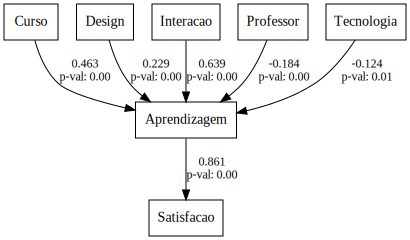

In [ ]:
g = semopy.semplot(modelo_completo_1, "model1.png")
display.display(g)

# Modelo 2


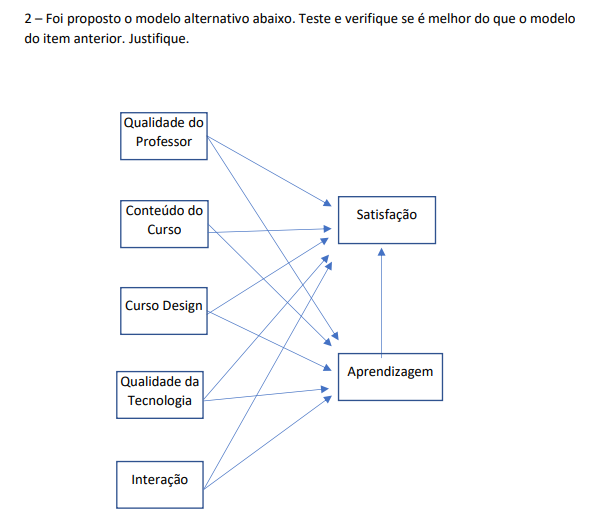

In [ ]:
import semopy

# define full measurement and structural model
modelo_2 = """
Aprendizagem ~ Professor
Satisfacao ~ Professor
Aprendizagem ~ Curso
Satisfacao ~ Curso
Aprendizagem ~ Design
Satisfacao ~ Design
Aprendizagem ~ Tecnologia
Satisfacao ~ Tecnologia
Aprendizagem ~ Interacao
Satisfacao ~ Interacao
Satisfacao ~ Aprendizagem
"""

modelo_completo_2 = semopy.Model(modelo_2)
resultado_modelo_2 = modelo_completo_2.fit(tabela)

In [ ]:
print(resultado_modelo_2)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 19
Params: -0.184 0.463 0.230 -0.125 0.640 -0.005 0.563 0.095 0.085 0.178 0.250 1.831 2.332


In [ ]:
ins = modelo_completo_2.inspect()
print(ins)

            lval  op          rval  Estimate  Std. Err    z-value  \
0   Aprendizagem   ~     Professor -0.184160  0.057269  -3.215680   
1   Aprendizagem   ~         Curso  0.463044  0.054912   8.432517   
2   Aprendizagem   ~        Design  0.229556  0.056963   4.029953   
3   Aprendizagem   ~    Tecnologia -0.124534  0.047992  -2.594875   
4   Aprendizagem   ~     Interacao  0.639516  0.053323  11.993287   
5     Satisfacao   ~     Professor -0.004744  0.051589  -0.091964   
6     Satisfacao   ~         Curso  0.562522  0.053953  10.426205   
7     Satisfacao   ~        Design  0.095019  0.051782   1.834963   
8     Satisfacao   ~    Tecnologia  0.084691  0.042988   1.970122   
9     Satisfacao   ~     Interacao  0.178408  0.057173   3.120514   
10    Satisfacao   ~  Aprendizagem  0.249976  0.050330   4.966760   
11  Aprendizagem  ~~  Aprendizagem  2.332325  0.187337  12.449900   
12    Satisfacao  ~~    Satisfacao  1.831471  0.147107  12.449900   

         p-value  
0   1.301358e-

In [ ]:
semopy.calc_stats(modelo_completo_2)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,15,26,0.000098,1.0,1961.531767,1.00775,1.0,1.0,1.0,1.013433,0,25.999999,74.575439,3.154077e-07


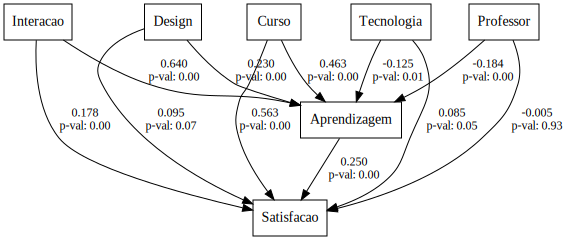

In [ ]:
g = semopy.semplot(modelo_completo_2, "model2.png")
display.display(g)

In [ ]:
comparando o RMSEA nota-se que o segundo modelo e melhor.

# Escolha?



# Exercicio 3

In [ ]:
import semopy

# define full measurement and structural model
modelo_3 = """
Satisfacao ~ Interacao
Satisfacao ~ Design
Satisfacao ~ Curso
Satisfacao ~ Aprendizagem
Interacao ~ Professor
Interacao ~ Tecnologia
Aprendizagem ~ Interacao
Aprendizagem ~ Curso
Aprendizagem ~ Design

"""

modelo_completo_3 = semopy.Model(modelo_3)
resultado_modelo_3 = modelo_completo_3.fit(tabela)

In [ ]:
print(resultado_modelo_3)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.098
Number of iterations: 22
Params: 0.216 0.138 0.555 0.234 0.570 0.279 0.508 0.430 0.145 2.710 1.855 2.480


In [ ]:
ins = modelo_completo_3.inspect()
print(ins)

            lval  op          rval  Estimate  Std. Err    z-value  \
0      Interacao   ~     Professor  0.569723  0.044433  12.821965   
1      Interacao   ~    Tecnologia  0.278912  0.044551   6.260571   
2   Aprendizagem   ~     Interacao  0.508060  0.042828  11.862927   
3   Aprendizagem   ~         Curso  0.429535  0.052448   8.189770   
4   Aprendizagem   ~        Design  0.145394  0.053111   2.737533   
5     Satisfacao   ~     Interacao  0.216243  0.044661   4.841864   
6     Satisfacao   ~        Design  0.138339  0.046484   2.976058   
7     Satisfacao   ~         Curso  0.554829  0.050025  11.091012   
8     Satisfacao   ~  Aprendizagem  0.234243  0.049119   4.768885   
9      Interacao  ~~     Interacao  2.709966  0.217670  12.449900   
10  Aprendizagem  ~~  Aprendizagem  2.480475  0.199237  12.449900   
11    Satisfacao  ~~    Satisfacao  1.855218  0.149015  12.449900   

         p-value  
0   0.000000e+00  
1   3.835705e-10  
2   0.000000e+00  
3   2.220446e-16  
4   6.1

In [ ]:
semopy.calc_stats(modelo_completo_3)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,16,25,30.256249,0.016718,1961.531796,0.992638,0.984575,0.975899,0.984575,0.988497,0.053699,23.804798,68.643666,0.097601


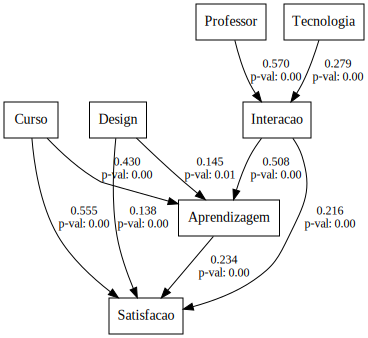

In [ ]:
g = semopy.semplot(modelo_completo_3, "model3.png")
display.display(g)

Como RMSEA do modelo anterior e melhor, o modelo anterior tambem e melhor

# Exercicio 4


Para verificar se "Tecnologia" é moderadora entre "Interação" e "Aprendizagem", irei separar "Tecnologia" em 4 quatis e analizar um grafico de dispersão para cada um dos quartis e verificar se existe mudança significativa entre a variavel dependente (Aprendizagem) e a Independente (Interação)

In [ ]:
tabela.head()

,id,Idade,genero,ALOC,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem,quartil_tec
0,1,33,Masculino,Interno,6.6,7.2,3.6,6.6,6.3,7.4,5.3,2
1,2,24,Feminino,Interno,9.5,9.4,9.3,9.9,9.4,9.9,9.6,4
2,3,30,Masculino,Interno,6.9,8.8,8.3,7.7,6.7,9.3,8.3,3
3,4,46,Feminino,Interno,6.5,4.4,5.9,6.7,6.1,6.8,4.7,2
4,5,28,Feminino,Interno,5.8,7.1,7.6,4.9,4.2,8.6,5.1,1


In [ ]:
# Criando uma variavel categorica para identificar qual é o quartile (Tecnologia) ao qual aquela amostra pertence
tabela['quartil_tec'] = pd.qcut(tabela.Tecnologia, q=[0, .25, 0.5, .75, 1], labels=[1, 2, 3, 4])
tabela.head()

,id,Idade,genero,ALOC,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem,quartil_tec
0,1,33,Masculino,Interno,6.6,7.2,3.6,6.6,6.3,7.4,5.3,2
1,2,24,Feminino,Interno,9.5,9.4,9.3,9.9,9.4,9.9,9.6,4
2,3,30,Masculino,Interno,6.9,8.8,8.3,7.7,6.7,9.3,8.3,3
3,4,46,Feminino,Interno,6.5,4.4,5.9,6.7,6.1,6.8,4.7,2
4,5,28,Feminino,Interno,5.8,7.1,7.6,4.9,4.2,8.6,5.1,1


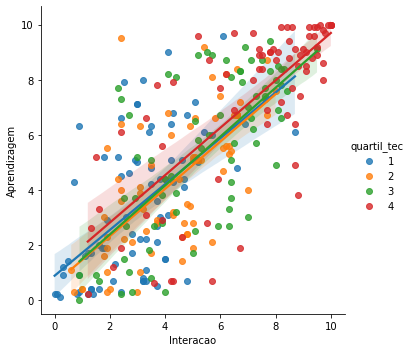

In [ ]:
sns.lmplot(x="Interacao", y="Aprendizagem", hue="quartil_tec",data=tabela);

### Verificando as regressões lineares em um mesmo grafico para ficar mais facil comparar, tudo indica que "Tecnologia" não é moderadora pois não é possivel observar um comportamento significativamente diferente entre "Interação" e "Aprendizagem" quando filtramos as amostragem em quartis com base na "Tecnologia"

Vamos agora separar os quartis em tabelas diferentes com o intuito de encontrar o valor numérico dos coeficientes das retas de cada quartil.

In [ ]:
tabela_25 = tabela.query( f'Tecnologia <= {tabela.Tecnologia.quantile(0.25)}')
tabela_25_50 = tabela.query( f'Tecnologia <= {tabela.Tecnologia.quantile(0.5)} and Tecnologia > {tabela.Tecnologia.quantile(0.25)}')
tabela_50_75 = tabela.query( f'Tecnologia <= {tabela.Tecnologia.quantile(0.75)} and Tecnologia > {tabela.Tecnologia.quantile(0.5)}')
tabela_75_100 = tabela.query( f'Tecnologia > {tabela.Tecnologia.quantile(0.75)}')

In [ ]:
print(tabela_25.shape)
print(tabela_25_50.shape)
print(tabela_50_75.shape)
print(tabela_75_100.shape)

(80, 11)
(78, 11)
(74, 11)
(78, 11)


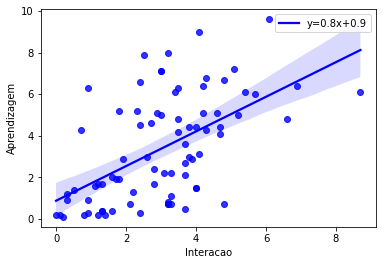

In [ ]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(tabela_25.Interacao,tabela_25.Aprendizagem)

# use line_kws to set line label for legend
ax = sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_25, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()
#sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_25)

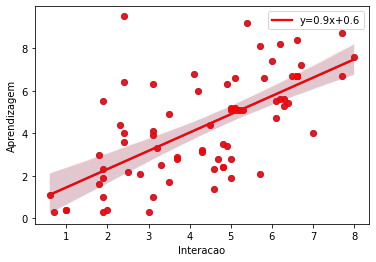

In [ ]:
#sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_25_50)
slope, intercept, r_value, p_value, std_err = stats.linregress(tabela_25_50.Interacao,tabela_25_50.Aprendizagem)

# use line_kws to set line label for legend
ax = sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_25_50, color='r', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

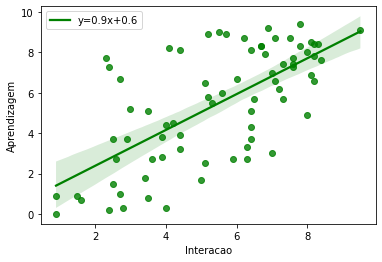

In [ ]:
#sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_25_50)
slope, intercept, r_value, p_value, std_err = stats.linregress(tabela_50_75.Interacao,tabela_50_75.Aprendizagem)

# use line_kws to set line label for legend
ax = sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_50_75, color='g', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

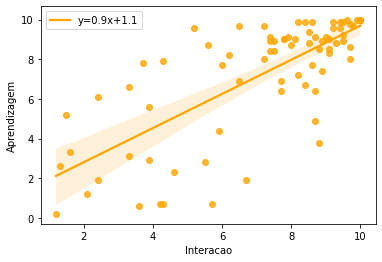

In [ ]:

#sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_25_50)
slope, intercept, r_value, p_value, std_err = stats.linregress(tabela_75_100.Interacao,tabela_75_100.Aprendizagem)

# use line_kws to set line label for legend
ax = sns.regplot(x="Interacao", y="Aprendizagem", data=tabela_75_100, color='orange', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

## Como foi possivel observar nas equaçoes de cada quartil, a variação do coeficiente de inclinação das retas varia entre 0.8 e 0.9, o que é suficiente para afirmar que "Tecnologia" não esta atuando como uma variavel moderadora entre "Interação" e "Tecnologia".